# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [3]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

AttributeError: module 'inauguralproject' has no attribute 'square'

In [4]:
from inauguralproject import ExchangeEconomyClass

**Question 1.2** 

edgeworth box

optimale allokeringer 

In [5]:
edgeworth = ExchangeEconomyClass()

def edgeworth_box(N):
    # Initialize lists to store x1A, x2A, x1B, and x2B
    x1A = [i / N for i in range(N + 1)]
    x2A = [i / N for i in range(N + 1)]
    x1B = [1 - x for x in x1A]
    x2B = [1 - x for x in x2A]

    # Calculate utility for initial endowments
    uA_initial = edgeworth.utility_A(edgeworth.par.w1A, edgeworth.par.w2A)
    print('uA_initial', uA_initial)
    uB_initial = edgeworth.utility_B((1-edgeworth.par.w1A), (1-edgeworth.par.w2A))
    print('uB_initial', uB_initial)

    # Lists to store x1A_val and x2A_val when condition is satisfied
    x1A_opt = []
    x2A_opt = []

    # Iterate over all combinations of x1A and x2A
    for x1A_val in x1A:
        for x2A_val in x2A:
            # Calculate utility for current allocation
            uA_current = edgeworth.utility_A(x1A_val, x2A_val)
            uB_current = edgeworth.utility_B(1-x1A_val, 1-x2A_val)
            
            # Check if current utility is greater than or equal to initial utility
            if uA_current >= uA_initial and uB_current >= uB_initial:
                x1A_opt.append(x1A_val)
                x2A_opt.append(x2A_val)

    # Return the lists of efficient allocations
    return x1A_opt, x2A_opt

# Call the function with N value
x1A_opt, x2A_opt = edgeworth_box(N=75)
print("x1A_opt:", x1A_opt)
print("x2A_opt:", x2A_opt)

uA_initial 0.41601676461038084
uB_initial 0.30365889718756617
x1A_opt: [0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667

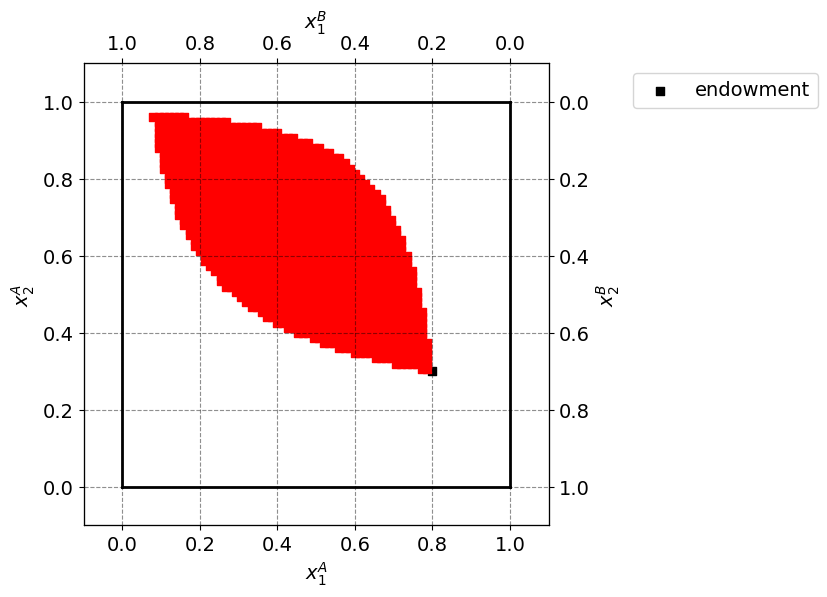

In [6]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt,x2A_opt,marker='s',color='red',label='endowment')

**Question 1.2**

priser

In [10]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):

    #Initialize lists to store p1
    p1 = [0.5 + 2*(i / N) for i in range(N)]
    
    #store 
    p1_error = []

    # Iterate over all combinations of x1A and x2A
    for p1_val in zip(p1):
        eps1, eps2 = clearing_market_error.check_market_clearing(p1_val)
        p1_error.append((eps1, eps2))

    return eps1, eps2

print(eps1)
print(eps2)

# Call the function with N value
error_clearing(N=75)

-0.37088948787062004
1.2786666666666673


TypeError: can't multiply sequence by non-int of type 'float'

In [8]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):
    # Initialize lists to store p1
    p1 = [0.5 + 2*(i / N) for i in range(N)]
    
    # Store 
    p1_error = []

    # Initialize eps1 and eps2
    eps1 = None
    eps2 = None

    # Iterate over all combinations of p1
    for p1_val in p1:
        eps1, eps2 = clearing_market_error.check_market_clearing(p1_val)

    return eps1, eps2

# Call the function with N value and capture the returned values
eps1, eps2 = error_clearing(N=75)

# Print the results
print("eps1:", eps1)
print("eps2:", eps2)

eps1: -0.37088948787062004
eps2: 1.2786666666666673


In [1]:
# Step 2: Create an instance
economy = ExchangeEconomyClass()

# Step 3: Call the method
N = 75  # Convert N to a float
p1 = [0.5 + 2*(i / N) for i in range(N)]
eps1, eps2 = economy.check_market_clearing(p1)

# Step 4: Print or use the results
print("eps1:", eps1)
print("eps2:", eps2)

NameError: name 'ExchangeEconomyClass' is not defined

In [118]:
economy = ExchangeEconomyClass()

# Step 3: Call the method
p1 = 10 # Example price
eps1, eps2 = economy.check_market_clearing(p1)

# Step 4: Print or use the results
print("eps1:", eps1)
print("eps2:", eps2)

TypeError: 'int' object is not iterable

# Question 2

Explain your code and procedure

In [3]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):

    #Initialize lists to store p1
    p1 = [0.5 + 2*(i / N) for i in range(N)]
    
    #store 
    p1_error = []

    # Iterate over all combinations of x1A and x2A
    for p1_val in p1:
        # Calculate utility for current allocation
        error1 = error_clearing.eps1(p1)
            
        
            uA_current = edgeworth.utility_A(x1A_val, x2A_vals)
            
            # Check if current utility is greater than or equal to initial utility
            if uA_current >= uA_initial and uB_current >= uB_initial:
                x1A_opt.append(x1A_val)
                x2A_opt.append(x2A_val)

    # Return the lists of efficient allocations
    return x1A_opt, x2A_opt

# Call the function with N value
x1A_opt, x2A_opt = edgeworth_box(N=75)

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.